<a href="https://colab.research.google.com/github/Arunav07/exoplanets/blob/main/Causal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y graphviz libgraphviz-dev
!pip install scikit-learn==1.1.3
!pip install pydot pydotplus dowhy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd64 2.24.32-4ubuntu4 [14.7 kB]
Get:4 http://archive.ubuntu.com

In [2]:
#Libraries
# Standard libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


# Sklearn-preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils import class_weight

# Machine Learning Algorithms
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, IsolationForest,
                              RandomForestRegressor, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier)
from sklearn.linear_model import Perceptron

# Performance metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
from keras.preprocessing import image
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import seaborn as sns
import astropy.io.fits as fits
import astropy.units as u
import astropy.time as time_astropy
from astropy.io import fits

import networkx as nx


In [3]:
planets = pd.read_csv("dataset_101.csv")
planets.head()

,pl_name,hostname,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,11 Com,Radial Velocity,2007,326.03000,0.32,-0.32,0.0,1.29,0.05,...,0.30,-0.30,0.0,-0.35,0.09,-0.09,0.0,93.1846,1.9238,-1.9238
1,11 Com b,11 Com,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.21,0.06,...,0.40,-0.30,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238
2,11 UMi b,11 UMi,Radial Velocity,2009,516.22000,3.25,-3.25,0.0,1.54,0.07,...,0.25,-0.25,0.0,0.04,0.04,-0.04,0.0,125.3210,1.9765,-1.9765
3,11 UMi b,11 UMi,Radial Velocity,2009,NaN,NaN,NaN,NaN,1.51,0.06,...,0.40,-0.30,0.0,NaN,NaN,NaN,NaN,125.3210,1.9765,-1.9765
4,11 UMi b,11 UMi,Radial Velocity,2009,516.21997,3.20,-3.20,0.0,1.53,0.07,...,0.69,-0.69,0.0,-0.02,NaN,NaN,0.0,125.3210,1.9765,-1.9765


In [8]:
#FINDING COMMON PLANETS BETWEEN PHL_CATALOG and OUR DATASET
# Load the datasets
dataset_101 = pd.read_csv("dataset_101.csv")
phl_exoplanet_catalog = pd.read_csv("phl_exoplanet_catalog.csv")

# Extract the planet names from each dataset
dataset_101_planets = set(dataset_101["pl_name"])
phl_exoplanet_catalog_planets = set(phl_exoplanet_catalog["P_NAME"])

# Find the common planets
common_planets = dataset_101_planets.intersection(phl_exoplanet_catalog_planets)

# Print the common planets
print("Common planets:", common_planets)

Common planets: {'Kepler-1587 b', 'Kepler-674 b', 'HD 64114 b', 'Kepler-616 b', 'Kepler-167 c', 'Kepler-1545 b', 'HD 97658 b', 'Kepler-299 e', 'HD 75898 b', 'Kepler-371 c', 'HAT-P-4 b', 'Kepler-111 c', 'Kepler-857 b', 'HD 114386 b', 'Kepler-339 c', 'HD 20781 d', 'Kepler-392 c', 'Kepler-1535 b', 'KIC 5951458 b', 'GJ 1214 b', 'Kepler-181 c', 'tau Boo b', 'K2-19 d', 'Kepler-666 b', 'Kepler-1349 b', 'OGLE-2008-BLG-355L b', 'HD 208897 b', 'Kepler-160 c', 'Kepler-1332 b', 'HAT-P-25 b', 'Kepler-652 b', 'Kepler-836 b', 'Kepler-819 b', 'Kepler-396 c', 'Kepler-1356 b', 'tau Cet h', 'OGLE-2008-BLG-092L b', 'Kepler-335 b', 'Kepler-926 b', 'WASP-48 b', 'K2-229 b', 'WASP-15 b', 'Kepler-352 c', 'Kepler-509 b', 'V1298 Tau b', 'Kepler-1155 b', 'Kepler-1467 b', 'HD 155358 c', 'Kepler-1392 b', 'Kepler-649 b', 'OGLE-2012-BLG-0026L b', 'K2-195 b', 'Kepler-1556 b', 'Kepler-549 b', 'Kepler-1061 b', 'Kepler-505 b', 'Kepler-69 c', 'Kepler-1441 b', 'Kepler-687 b', 'K2-123 b', 'Kepler-1638 b', 'K2-132 b', 'GJ 41

In [9]:
# Create a list of habitable planets from the phl_exoplanet_catalog dataset
habitable_planets = phl_exoplanet_catalog['P_NAME'].tolist()

# Create a new column in dataset_101 and set the values to 1 if the planet is habitable, 0 otherwise
planets['habitable'] = dataset_101['pl_name'].apply(lambda x: 1 if x in habitable_planets else 0)
planets.head()

,pl_name,hostname,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,sy_dist,sy_disterr1,sy_disterr2,habitable
0,11 Com b,11 Com,Radial Velocity,2007,326.03000,0.32,-0.32,0.0,1.29,0.05,...,-0.30,0.0,-0.35,0.09,-0.09,0.0,93.1846,1.9238,-1.9238,1
1,11 Com b,11 Com,Radial Velocity,2007,NaN,NaN,NaN,NaN,1.21,0.06,...,-0.30,0.0,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238,1
2,11 UMi b,11 UMi,Radial Velocity,2009,516.22000,3.25,-3.25,0.0,1.54,0.07,...,-0.25,0.0,0.04,0.04,-0.04,0.0,125.3210,1.9765,-1.9765,1
3,11 UMi b,11 UMi,Radial Velocity,2009,NaN,NaN,NaN,NaN,1.51,0.06,...,-0.30,0.0,NaN,NaN,NaN,NaN,125.3210,1.9765,-1.9765,1
4,11 UMi b,11 UMi,Radial Velocity,2009,516.21997,3.20,-3.20,0.0,1.53,0.07,...,-0.69,0.0,-0.02,NaN,NaN,0.0,125.3210,1.9765,-1.9765,1


In [10]:
print(planets.shape)
set1 = (set(planets.columns))
print(set1)

(34138, 48)
{'st_radlim', 'st_masserr1', 'discoverymethod', 'st_met', 'st_rad', 'st_raderr1', 'pl_radelim', 'pl_radeerr1', 'pl_radeerr2', 'pl_orbsmaxerr2', 'pl_masseerr1', 'pl_orbsmaxlim', 'pl_orbeccenerr2', 'pl_orbpererr2', 'habitable', 'pl_masselim', 'sy_disterr2', 'sy_disterr1', 'pl_eqtlim', 'pl_masseerr2', 'disc_year', 'st_tefferr2', 'hostname', 'pl_orbeccen', 'pl_orbpererr1', 'pl_name', 'pl_orbsmax', 'pl_orbeccenerr1', 'st_masslim', 'st_metlim', 'sy_dist', 'pl_eqterr1', 'pl_orbeccenlim', 'pl_masse', 'pl_orbperlim', 'st_meterr1', 'pl_eqt', 'pl_orbper', 'st_tefferr1', 'pl_orbsmaxerr1', 'pl_eqterr2', 'st_teff', 'st_raderr2', 'st_meterr2', 'pl_rade', 'st_mass', 'st_masserr2', 'st_tefflim'}


In [11]:
# remove columns with more than 40% missing data
def remove_missing(f):
    count = len(planets[planets[f].isnull()])
    if count/len(planets) > 0.4:
        return 1
    else:
        return 0

missing_values = [x for x in planets.columns if remove_missing(x)]
planets = planets.drop(missing_values, axis=1)
print(planets.shape)
planets.dropna()
print(planets.shape)
planets = planets.replace([np.inf, -np.inf, np.nan], 0)


(34138, 33)
(34138, 33)


In [12]:
set2 = (set(planets.columns))

print(set1.difference(set2))

{'pl_eqtlim', 'pl_orbsmaxerr2', 'pl_masseerr2', 'pl_masseerr1', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_eqterr2', 'pl_orbeccenerr2', 'pl_eqterr1', 'pl_orbeccenlim', 'pl_masse', 'pl_masselim', 'pl_eqt'}


In all the columns from the dataset, we remove the following column values because they have more than 40% missing data. 



*     pl_orbeccenerr2
*   	pl_eqterr2
*   	pl_masseerr1
*   	pl_masse
*   	pl_orbeccen
*   	pl_orbsmaxerr1
*   	pl_orbsmaxerr2
*   	pl_eqt
*   	pl_eqterr1
*   	pl_masseerr2
*   	pl_orbsmax
*   	pl_eqtlim
*   	pl_orbeccenerr1
*   	pl_masselim
*   	pl_orbeccenlim



In [13]:
import dowhy
from dowhy import CausalModel
import pydot


In [14]:
print(list(planets.columns))

['pl_name', 'hostname', 'discoverymethod', 'disc_year', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'habitable']


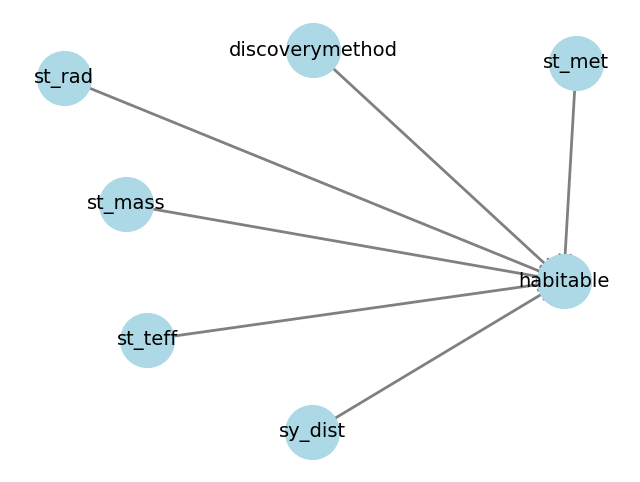

In [15]:
# Create the directed acyclic graph
G = nx.DiGraph()
G.add_edges_from([('st_teff', 'habitable'), ('st_rad', 'habitable'), ('st_mass', 'habitable'), ('st_met', 'habitable'), ('sy_dist', 'habitable'), ('discoverymethod', 'habitable')])

# Visualize the graph using Matplotlib
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')
plt.axis('off')
plt.show()

In [16]:
# Create a causal model from the graph and data
model = CausalModel(
    data=planets,
    treatment='pl_orbper',
    outcome='habitable',
    common_causes=['pl_rade', 'st_teff', 'st_rad', 'st_mass', 'st_met']
)
# Identify the causal effect of interest
causal_effect = model.identify_effect()

# Estimate the causal effect using do-calculus
estimate = model.estimate_effect(causal_effect, method_name="backdoor.linear_regression")

# Print the causal effect estimate
print(estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                          
────────────(E[habitable|st_met,st_teff,st_rad,pl_rade,st_mass])
d[pl_orbper]                                                    
Estimand assumption 1, Unconfoundedness: If U→{pl_orbper} and U→habitable then P(habitable|pl_orbper,st_met,st_teff,st_rad,pl_rade,st_mass,U) = P(habitable|pl_orbper,st_met,st_teff,st_rad,pl_rade,st_mass)

## Realized estimand
b: habitable~pl_orbper+st_met+st_teff+st_rad+pl_rade+st_mass
Target units: ate

## Estimate
Mean value: -2.1380197612330676e-09



In [17]:
!pip install --upgrade astroquery
!pip install astroquery['exoplanet']


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive as ExoplanetArchive
from astropy import units as u
archive = ExoplanetArchive.get_instance()

# Query the exoplanet archive for planets with habitable zone distances
# and stellar temperature greater than 5000 K
planets = ExoplanetArchive.query_criteria(
    select="*", 
    where=f"pl_insol > 1 and st_teff > 5000", 
    cache=True,
    table="")

# Convert temperature to flux using Stefan-Boltzmann law
planets['st_flux'] = (planets['st_teff']**4 * u.K**4).to(u.W/u.m**2, equivalencies=u.spectral_density(5000*u.AA))

# Save the resulting table to a CSV file
planets.write('exoplanets.csv', format='csv', overwrite=True)


TypeError: ignored